In [46]:
import numpy as np
import matplotlib
# matplotlib.rcParams['figure.figsize']=(4,3)
# %matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import GPy

In [47]:
# Import datasets as pandas
# from scipy.io import loadmat
import pandas as pd
# data_set = loadmat("Mark_4sec_CA1PSD_ISO_freqamp_020619.mat")
CA1_df = pd.read_csv("Mark_4sec_CA3PSD_ISO_freqamp_020619.csv")
CA1_df

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
0,17,30,1.066899e-07,4.362881e-09,6.410145e-10,6.153980e-10,4.952555e-10,3.655776e-10,6.689563e-10,4.548710e-10,...,9.614848e-13,5.535816e-13,3.549981e-13,2.959776e-13,6.462898e-13,9.176671e-13,7.071067e-13,7.704253e-13,1.278144e-12,6.975427e-13
1,42,40,9.644295e-08,1.100460e-09,3.698362e-10,1.196834e-10,1.135362e-10,1.471786e-10,3.404247e-10,4.498116e-10,...,1.350018e-12,1.003581e-12,7.857398e-13,1.141451e-12,8.279703e-13,1.007723e-12,1.160121e-12,9.708206e-13,5.918814e-13,7.502253e-13
2,35,30,9.664707e-08,1.686739e-09,1.383835e-09,9.779574e-10,2.740501e-10,2.981321e-10,3.574340e-10,4.000314e-10,...,1.167509e-12,7.559837e-13,1.333016e-12,1.637356e-12,2.252303e-12,9.505286e-13,1.173716e-12,1.199101e-12,8.871386e-13,9.026766e-13
3,23,50,9.750570e-08,1.306145e-09,3.598379e-10,2.804073e-10,2.125693e-10,2.026804e-10,2.883272e-10,2.668982e-10,...,1.366467e-12,2.443904e-12,2.535353e-12,1.229021e-12,9.005429e-13,1.069436e-12,9.512349e-13,7.234959e-13,1.241802e-12,8.649545e-13
4,42,50,1.020247e-07,5.254584e-09,4.163858e-09,1.331331e-09,4.225174e-10,6.844851e-10,1.042377e-09,2.894596e-10,...,8.403170e-13,5.947037e-13,7.975147e-13,1.019247e-12,1.142941e-12,1.185287e-12,9.356042e-13,1.085042e-12,8.461304e-13,4.135749e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,29,40,9.438211e-08,8.953157e-10,5.325697e-10,4.034846e-10,3.847985e-10,7.124458e-10,6.019659e-10,5.045601e-10,...,3.915490e-13,3.560932e-13,3.947136e-13,3.543831e-13,5.283461e-13,2.827943e-13,3.592653e-13,4.569682e-13,3.788961e-13,4.503580e-13
380,17,50,9.503613e-08,1.012707e-09,3.889901e-10,2.982987e-10,2.975021e-10,3.704936e-10,7.720063e-10,5.561578e-10,...,3.057599e-13,3.755007e-13,3.242915e-13,2.136803e-13,2.412199e-13,2.010544e-13,2.495399e-13,5.407236e-13,3.228808e-13,3.071144e-13
381,42,30,9.467551e-08,1.790015e-09,1.131069e-09,1.480148e-09,1.404767e-09,1.095754e-09,7.758978e-10,1.129526e-09,...,5.972925e-13,7.388474e-13,4.952310e-13,4.230530e-13,3.500203e-13,3.113596e-13,4.071015e-13,6.988792e-13,6.040085e-13,3.130020e-13
382,7,50,9.344372e-08,8.772011e-10,4.970744e-10,5.333557e-10,4.927356e-10,7.601632e-10,6.495486e-10,4.785051e-10,...,2.582216e-13,2.178556e-13,1.779925e-13,2.533067e-13,1.734665e-13,1.106245e-13,1.546325e-13,3.050555e-13,3.590836e-13,3.578827e-13


In [48]:
CA1_df.describe()

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
count,384.000000,384.000000,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,...,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,21.125000,25.000000,9.876748e-08,1.483792e-09,7.216810e-10,5.297563e-10,4.963279e-10,5.403563e-10,5.392557e-10,4.841397e-10,...,6.546182e-13,6.091531e-13,5.459146e-13,5.131811e-13,4.991757e-13,4.661958e-13,4.738421e-13,4.716295e-13,4.689914e-13,4.309777e-13
std,12.630313,17.100532,2.344670e-08,9.873200e-10,4.625125e-10,2.804616e-10,2.457717e-10,2.871590e-10,2.926409e-10,2.888415e-10,...,3.599384e-13,3.487042e-13,3.449344e-13,3.213658e-13,2.975148e-13,2.591702e-13,2.692950e-13,2.528458e-13,2.351999e-13,2.110681e-13
min,5.000000,0.000000,9.224978e-08,4.018869e-10,1.779852e-10,1.196834e-10,8.558949e-11,5.937738e-11,5.033034e-11,3.842182e-11,...,1.292999e-13,1.297780e-13,6.882206e-14,6.250159e-14,7.442178e-14,1.030722e-13,1.097927e-13,1.147326e-13,1.041554e-13,1.374316e-13
25%,10.000000,10.000000,9.467907e-08,7.756680e-10,3.950088e-10,3.139932e-10,3.081002e-10,3.292297e-10,3.149414e-10,2.533371e-10,...,3.921124e-13,3.629012e-13,3.203597e-13,2.946486e-13,2.972690e-13,2.745972e-13,2.990072e-13,3.003718e-13,3.096119e-13,2.838366e-13
50%,20.000000,25.000000,9.589994e-08,1.195470e-09,5.937907e-10,4.923716e-10,4.553629e-10,5.000206e-10,5.065640e-10,4.327971e-10,...,5.770754e-13,5.490138e-13,4.637024e-13,4.273831e-13,4.251277e-13,4.168663e-13,3.992897e-13,4.026246e-13,4.029964e-13,3.855960e-13
75%,30.500000,40.000000,9.758217e-08,1.902026e-09,9.339533e-10,6.661477e-10,6.518402e-10,7.017185e-10,7.320325e-10,6.748503e-10,...,8.488597e-13,7.562070e-13,6.810909e-13,6.549298e-13,6.422870e-13,5.835571e-13,5.901386e-13,5.815182e-13,5.953072e-13,5.269147e-13
max,42.000000,50.000000,4.962646e-07,6.308812e-09,4.163858e-09,2.628835e-09,1.482603e-09,1.520968e-09,1.659829e-09,1.703842e-09,...,2.595211e-12,2.443904e-12,2.535353e-12,2.213978e-12,2.458930e-12,2.006133e-12,2.530077e-12,1.943353e-12,1.592802e-12,1.795189e-12


In [49]:
np.r_[0:2, 32:52]

array([ 0,  1, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51])

In [50]:
# gamma = np.arange(32,51)
# print(gamma)
print(CA1_df.iloc[1, np.r_[0:2, 33:52]])

Stim_1    4.200000e+01
Stim_2    4.000000e+01
Xk0_32    3.920551e-11
Xk0_33    2.185532e-11
Xk0_34    1.065976e-11
Xk0_35    1.248434e-11
Xk0_36    2.544466e-11
Xk0_37    1.974901e-11
Xk0_38    7.941763e-12
Xk0_39    1.519301e-11
Xk0_40    1.555842e-11
Xk0_41    1.090195e-11
Xk0_42    8.529903e-12
Xk0_43    7.444033e-12
Xk0_44    3.461845e-12
Xk0_45    6.004862e-12
Xk0_46    1.083304e-11
Xk0_47    7.732998e-12
Xk0_48    5.337480e-12
Xk0_49    8.791972e-12
Xk0_50    5.464634e-12
Name: 1, dtype: float64


In [51]:
# sum of pre stimulation gamma

data = np.sum(CA1_df.iloc[:, 33:52], axis=1)
sum_preStim_gamma = pd.DataFrame(data=data, columns=['sum_preStim_gamma'])
np.shape(sum_preStim_gamma)
sum_preStim_gamma

,sum_preStim_gamma
0,3.266571e-10
1,2.425945e-10
2,3.117866e-10
3,2.868627e-10
4,3.521665e-10
...,...
379,1.268502e-10
380,1.239859e-10
381,1.880050e-10
382,1.199899e-10


# Select the gamma freq. stimulations

CA1_df_gamma = CA1_df[CA1_df['Stim_1']>32]
CA1_df_gamma

In [52]:
# calculate mean psd for Xk0 and Xk1
# _, Y = CA1_df_gamma.iloc[:, 2:].mean(axis=1)
# select Kx1_32:50 are column? 
Y = np.mean(CA1_df.iloc[:, 133:152],axis=1)
print(np.shape(Y))
# Y.reset_index(drop=True, inplace=True)
Y_reshape =Y[:, np.newaxis]
print(Y)

(384,)
0      1.917907e-10
1      1.553763e-10
2      1.902064e-10
3      8.779002e-11
4      1.502196e-10
           ...     
379    3.689578e-11
380    5.195311e-11
381    9.565846e-11
382    4.421487e-11
383    5.924634e-11
Length: 384, dtype: float64


 C:\Users\sinad\AppData\Local\Temp\ipykernel_15020\865466885.py:7: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [53]:
X = CA1_df.iloc[:,  0:2]
X_preStim_gamma = X.join(sum_preStim_gamma)
# pd.concat(X, sum_preStim_gamma)
X_preStim_gamma

,Stim_1,Stim_2,sum_preStim_gamma
0,17,30,3.266571e-10
1,42,40,2.425945e-10
2,35,30,3.117866e-10
3,23,50,2.868627e-10
4,42,50,3.521665e-10
...,...,...,...
379,29,40,1.268502e-10
380,17,50,1.239859e-10
381,42,30,1.880050e-10
382,7,50,1.199899e-10


In [54]:
X_preStim_gamma.describe()

,Stim_1,Stim_2,sum_preStim_gamma
count,384.000000,384.000000,3.840000e+02
mean,21.125000,25.000000,2.171338e-10
std,12.630313,17.100532,1.016536e-10
min,5.000000,0.000000,8.137995e-11
25%,10.000000,10.000000,1.522623e-10
50%,20.000000,25.000000,1.923705e-10
75%,30.500000,40.000000,2.574274e-10
max,42.000000,50.000000,1.099913e-09


X.reset_index(drop=True, inplace=True)
X

In [55]:
# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

In [56]:
# create simple GP model
m = GPy.models.GPRegression(X_preStim_gamma,Y_reshape,ker)
display(m)

 C:\Users\sinad\anaconda3\envs\NeuroGaussianProcess\lib\site-packages\GPy\core\gp.py:85: UserWarning:Your kernel has a different input dimension 2 then the given X dimension 3. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


GP_regression.,value,constraints,priors
sum.Mat52.variance,1.0,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


 C:\Users\sinad\anaconda3\envs\NeuroGaussianProcess\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


GP_regression.,value,constraints,priors
sum.Mat52.variance,1.0,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


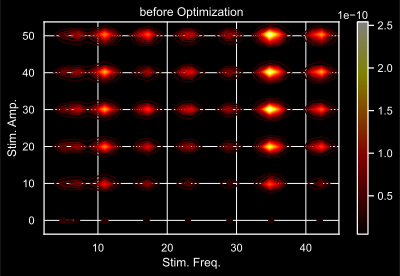

In [57]:
# matplotlib.use("Agg")
GPy.plotting.change_plotting_library("matplotlib")
# GPy.plotting.change_plotting_library('plotly')
fig1 = m.plot(visible_dims=[0,1],legend=False, xlabel='Stim. Freq.', ylabel='Stim. Amp.',
              title="before Optimization");
display(m);
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax);

In [58]:
# optimize and plot
m.optimize(messages=True,max_f_eval = 1000);

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s23  0007  -3.183898e+03   5.985035e-15 
Runtime:     00s23
Optimization status: Converged



GP_regression.,value,constraints,priors
sum.Mat52.variance,4.029323481128303e-18,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,7.896980021047796e-29,+ve,
Gaussian_noise.variance,7.896980021047796e-29,+ve,


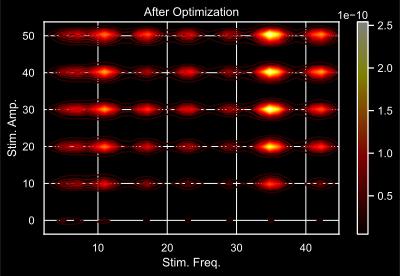

In [59]:
figure = m.plot(visible_dims=[0,1], legend=False, xlabel='Stim. Freq.' , ylabel='Stim. Amp.', title='After Optimization');
# display(GPy.plotting.show(figure, filename='basic_gp_regression_notebook_2d'))
display(m)
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax)


### Conditioning on min or max preStim gamma

In [60]:
# Conditioning on min of preStim gamma: 
np.shape(sum_preStim_gamma)

(384, 1)

In [61]:
min_preStim_gamma = np.empty((100,100))
min_preStim_gamma[:,:] = np.min(sum_preStim_gamma)
# print("The min is: ", min_preStim_gamma[0])
np.shape(min_preStim_gamma)

 C:\Users\sinad\anaconda3\envs\NeuroGaussianProcess\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'


(100, 100)

#### make a 100x100 array of frequencis (5,7 11,17, 23, 35, 42) and amplitudes (10,20,30,40,50)


In [62]:
rand_freq = np.random.choice([5,7,11,17, 23, 35, 42], size=(100,100))
# np.shape(rand_freq)
print(rand_freq[0:3])
rand_amp = np.random.choice([10,20,30,40,50], size=(100, 100))
print(rand_amp[0:3])
np.shape(rand_amp)
# rand_amp

[[11  7  5 35 35 23  5 42 42 42  7 17 11 42 17 42 17 11 35  5 23 11 42 42
   5 35 17 11 35  7 23  5 11 17  5  5  7 17  5 42 23  5 17 11 23 23 11 42
  23 35 11 17 17 23 35 23 17  5  5 35 17  5  7  7  7 42 23 17 42 17  5  5
  42  5 11  5 42 17 35  5 17 17 42 23  7 35  5 11 35  5 23 11 23 17 11  7
  11 23  5  5]
 [17 17 42  7  5  5  7 23  5 42 35  5 42  7  7 42 42  5 17  5 35 11  5  5
  42 11 42 35 42 35 17 35 11 42 11 23 11 11 42 17 42 35 11 23  5  5 23  5
  23 11 42  7 11  7 17 17  5 17 42  5 35 42  7  7 35  7 35 17 11  7 11 35
  23 23 17  5 42 11 35 35  5 11 17 35  5  5  5 17  7 17 17 23 35  5 35  5
  11 42 17 11]
 [ 5 35  5  7 35 23 42  7 35 11 11  7 42 17  7 23  7 23 23 11 17  5  7  5
  35  7 23 11  5 42 42  7  7 42 42 23 23 17  7  5 35  7  7 23 23  5 42  5
   5  5 23  7  5 23  7 17  5 35  7 42 17 11  5 35 17  7 17 17 23 17 35  7
   5  5 11 17 35 11 23  5  5  7 17 35 23  7  7  5 11 11 35 42 23 23 23 23
  11 42 42 23]]
[[10 30 20 10 10 20 10 10 40 50 20 10 40 20 30 10 40 40 50 50 50 5

(100, 100)

In [63]:
testX = np.array([rand_freq, rand_amp, min_preStim_gamma]) #52 , 50
print(np.shape(testX))
testX = np.transpose(testX)
print(testX[0,:])
np.shape(testX)

(3, 100, 100)
[[1.10000000e+01 1.00000000e+01 8.13799519e-11]
 [1.70000000e+01 4.00000000e+01 8.13799519e-11]
 [5.00000000e+00 1.00000000e+01 8.13799519e-11]
 [5.00000000e+00 4.00000000e+01 8.13799519e-11]
 [1.70000000e+01 5.00000000e+01 8.13799519e-11]
 [1.10000000e+01 4.00000000e+01 8.13799519e-11]
 [1.10000000e+01 5.00000000e+01 8.13799519e-11]
 [5.00000000e+00 5.00000000e+01 8.13799519e-11]
 [1.10000000e+01 1.00000000e+01 8.13799519e-11]
 [3.50000000e+01 1.00000000e+01 8.13799519e-11]
 [2.30000000e+01 5.00000000e+01 8.13799519e-11]
 [4.20000000e+01 1.00000000e+01 8.13799519e-11]
 [1.70000000e+01 2.00000000e+01 8.13799519e-11]
 [1.70000000e+01 4.00000000e+01 8.13799519e-11]
 [5.00000000e+00 2.00000000e+01 8.13799519e-11]
 [4.20000000e+01 4.00000000e+01 8.13799519e-11]
 [3.50000000e+01 3.00000000e+01 8.13799519e-11]
 [3.50000000e+01 5.00000000e+01 8.13799519e-11]
 [1.70000000e+01 1.00000000e+01 8.13799519e-11]
 [5.00000000e+00 4.00000000e+01 8.13799519e-11]
 [4.20000000e+01 3.0000000

(100, 100, 3)

In [64]:
a[:, :,:]  = m.posterior_samples_f(testX[1], full_cov=True, size=1)
np.shape(a)
# print(a)

(100, 1, 1)

In [65]:
print(np.arange(100))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [66]:
# TODO: do a loop to go over 100 column vectors and feed the predictor
posteriorTestY = np.empty((100, 100, 100))
simY  = np.empty((100, 100, 100))
simMse = np.empty((100, 100, 100))

for s in range(100):
    posteriorTestY[:, s:s+1, :] = m.posterior_samples_f(testX[s], full_cov=True, size=1)
        # print(np.shape(m.predict(testX)))
    simY[:, s, :], simMse[:, s, :] = m.predict(testX[s])

# posteriorTestY[:, :, :] = m.posterior_samples_f(testX[1], full_cov=True, size=1)
#         # print(np.shape(m.predict(testX)))
# simY[:, :, :], simMse[:, :, :] = m.predict(testX[1])
# posteriorTestY = m.posterior_samples_f(testX, full_cov=True, size=1)
# simY, simMse = m.predict(testX)
print("mean is: \n",simY[0],"\n\n Variance is: \n", simMse[0])
# posteriorTestY
np.shape(posteriorTestY)


mean is: 
 [[2.40365663e-19 2.40365663e-19 2.40365663e-19 ... 2.40365663e-19
  2.40365663e-19 2.40365663e-19]
 [2.30780886e-19 2.30780886e-19 2.30780886e-19 ... 2.30780886e-19
  2.30780886e-19 2.30780886e-19]
 [1.59704797e-19 1.59704797e-19 1.59704797e-19 ... 1.59704797e-19
  1.59704797e-19 1.59704797e-19]
 ...
 [2.69769934e-19 2.69769934e-19 2.69769934e-19 ... 2.69769934e-19
  2.69769934e-19 2.69769934e-19]
 [1.51572914e-19 1.51572914e-19 1.51572914e-19 ... 1.51572914e-19
  1.51572914e-19 1.51572914e-19]
 [1.23797390e-19 1.23797390e-19 1.23797390e-19 ... 1.23797390e-19
  1.23797390e-19 1.23797390e-19]] 

 Variance is: 
 [[4.02932347e-18 4.02932347e-18 4.02932347e-18 ... 4.02932347e-18
  4.02932347e-18 4.02932347e-18]
 [4.02932347e-18 4.02932347e-18 4.02932347e-18 ... 4.02932347e-18
  4.02932347e-18 4.02932347e-18]
 [4.02932347e-18 4.02932347e-18 4.02932347e-18 ... 4.02932347e-18
  4.02932347e-18 4.02932347e-18]
 ...
 [4.02932347e-18 4.02932347e-18 4.02932347e-18 ... 4.02932347e-18
  4

(100, 100, 100)

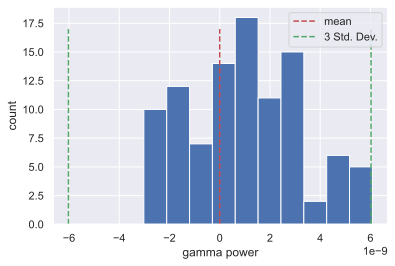

In [74]:
n, bins, patches = plt.hist(posteriorTestY[:,0,0], bins=10)
max_n = int(max(n))
plt.plot(simY[0:max_n, 0, 0], np.arange(0,max_n),'r--')
plt.plot(simY[0:max_n, 0, 0] - 3 * simMse[0:max_n, 0, 0] ** 0.5, np.arange(0,max_n),'--g')
plt.plot(simY[0:max_n, 0, 0] + 3 * simMse[0:max_n, 0, 0] ** 0.5, np.arange(0,max_n), '--g')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["mean","3 Std. Dev."])
plt.show()

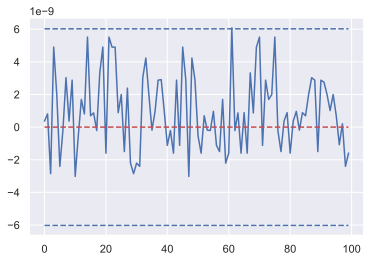

In [76]:
plt.plot(posteriorTestY[:,0,0])
plt.plot(simY[:, 0, 0], 'r--')
plt.plot(simY[:, 0, 0] + 3 * simMse[:, 0, 0]** 0.5, 'b--')
plt.plot(simY[:, 0, 0] - 3 * simMse[:, 0, 0]** 0.5, 'b--')
plt.show()

In [82]:
print(np.shape(testX), np.shape(simY[:,:,0:1]))

(100, 100, 3) (100, 100, 1)


In [92]:
sns.set()
# testX_int = np.array(testX[:,0:2,:], dtype = np.int_)
# print(testX_int[0:3,:,:])
data = np.append(testX[:,:,0:2], simY[:,:,0:1], axis=2)
print(np.shape(data))
# testX[0:3,0:2]
print(data[0,0,0:3])
# data_df = pd.DataFrame(data=data[:,0:4,0], columns=["freq.", "amp.","Stim_gamma", "mean_predic"])
# data_df

(100, 100, 3)
[1.10000000e+01 1.00000000e+01 2.40365663e-19]


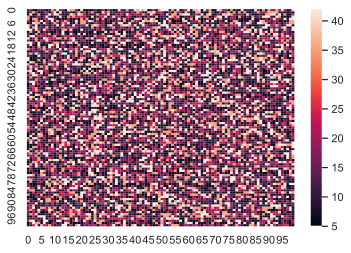

In [94]:
ax = sns.heatmap(data[:,:,0])
plt.show()